In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nnode1 import nnode1

# Introduction

This notebook will demonstrate how to use the code in the nnode1.py module.

## Define the ODE to solve

In [2]:
# Define the analytical solution.
def yanal(x):
    return 1 + exp(-x**2 / 2)

# Define the original differential equation:
# dy/dx + x*y = x  ->  dy/dx = x*(1 - y) = F(x,y)
def F(x, y):
    return x * (1 - y)

# Define the y-partial derivative of the differential equation.
def dF_dy(x, y):
    return -x

# Define the 2nd y-partial derivative of the differential equation.
def d2F_dy2(x, y):
    return 0

Plot the analytical solution and derivative.

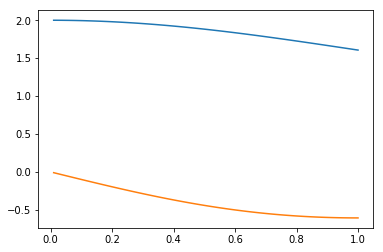

In [4]:
xamin = 0
xamax = 1
nanal = 100
dxa = (xamax - xamin) / nanal
xa = np.arange(xamin, xamax, dxa) + dxa
ya = np.zeros(nanal)
dya_dx = np.zeros(nanal)
for i in range(nanal):
    ya[i] = yanal(xa[i])
    dya_dx[i] = F(xa[i], ya[i])
plt.plot(xa, ya)
plt.plot(xa, dya_dx)

## Define the boundary conditions

In [5]:
xmin = 0
xmax = 1
ymin = 2
ymax = None

## Create the training data

In [6]:
ntrain = 10
dx = (xmax - xmin) / ntrain
x = np.arange(xmin, xmax, dx) + dx

In [7]:
(yt, dyt_dx) = nnode1(x, F, dF_dy, d2F_dy2, xmin, ymin)

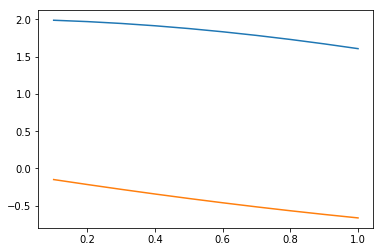

In [11]:
plt.plot(x,yt)
plt.plot(x, dyt_dx)

Plot the error in the estimated solution and derivative.

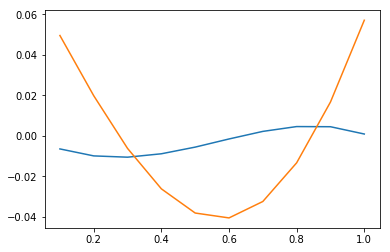

In [14]:
xamin = 0
xamax = 1
nanal = 10
dxa = (xamax - xamin) / nanal
xa = np.arange(xamin, xamax, dxa) + dxa
ya = np.zeros(nanal)
dya_dx = np.zeros(nanal)
for i in range(nanal):
    ya[i] = yanal(xa[i])
    dya_dx[i] = F(xa[i], ya[i])
plt.plot(xa, yt - ya)
plt.plot(xa, dya_dx - dyt_dx)